In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import glob
import imgaug.augmenters as iaa
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
archive_name = 'Nasa_Artemis.zip'
archive_path = '/content/drive/MyDrive/Nasa_Artemis.zip'

shutil.copy(archive_path, '.')

!7z x {archive_name}

data_path = '/content/Nasa_Artemis'
print('\nArchive extracted to VM\n')
print('-------------------------------------------------------------------------------------\n')
data_express_mode = True


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 151498006 bytes (145 MiB)

Extracting archive: Nasa_Artemis.zip
--
Path = Nasa_Artemis.zip
Type = zip
Physical Size = 151498006

  0%     15% 65 - Nasa_Artemis/Jessica_Meir/File_Jessica Meir official portrait in.jpg                                                                               33% 153 - Nasa_Artemis/Jessica_Meir/File_Jessica Meir portrait in a WB-57.jpg                                                                              

In [ ]:
os.listdir(data_path)

['Raja_Chari', 'Scott_Tingle', '.DS_Store', 'Jessica_Meir', 'Joseph_Acaba']

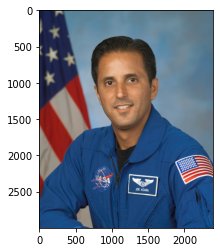

In [ ]:
joseph_1 = data_path + '/Joseph_Acaba' + '/File_Joseph Acaba.jpg - Wikimedia Commons.jpg'


joseph_img= imread(joseph_1)

plt.imshow(joseph_img)

In [ ]:
joseph_img.shape

(3000, 2400, 3)

In [ ]:
os.listdir(data_path+'/Joseph_Acaba')

['Joe Acaba_ NASA Astronaut _ My Path.png',
 '90 Joseph Akaba Photos and Premium High (1).jpg',
 'NASA Astronaut Joseph Acaba.png',
 'Teacher hosts radio show in space.jpeg',
 'Joseph M. Acaba _ Joseph M. Acaba is.jpg',
 'Astronaut Joe Acaba works on Combustion.jpg',
 'Astronaut Joseph Acaba Rescinded.jpg',
 'Army space Soldiers _ Article _ The.jpg',
 'Space_ NASA Astronaut Details Flight (1).jpg',
 'Texas Tech.jpg',
 'Astronaut Sends Prayers to Puerto Rico.jpg',
 'Astronaut Joseph Acaba_ Mission.jpg',
 'NASA - Astronaut Joe Acaba.jpg',
 'Five Astronautical Lessons From Joe.png',
 'Joseph M. Acaba NASA astronaut - Famed.png',
 'Joseph Acaba - Zimbio.jpg',
 'Joseph Michael _Joe_ Acaba (born May 17.jpg',
 'Joseph Acaba (1).jpg',
 'Joseph M. Acaba â\x80\x94 Google Arts & Culture.jpg',
 'NASA Astronaut Joe Acaba (1).jpg',
 '.DS_Store',
 'Joe Acaba â\x80\x93 Spaceflight101 (3).jpg',
 'Joseph Acaba (6).jpg',
 'From Central Florida science teacher to.jpg',
 'Puerto Rican astronaut Joseph Acab

# Data Transformation Pipeline 

In [ ]:
image_shape = (1000,1000,3)

# Image Augmentation

In [ ]:
# Train_images_path = glob.glob('/content/drive/MyDrive/Nasa_Artemis'+'/*')

all_image_urls = []
all_image_categories = []
for category in os.listdir(data_path):
  if category == '.DS_Store':
    continue
  category_path = os.path.join(data_path,category)
  for image_url in os.listdir(category_path):
    if image_url == '.DS_Store':
      continue
    all_image_urls.append(os.path.join(category_path,image_url))
    all_image_categories.append(category)


all_image_urls

['/content/Nasa_Artemis/Raja_Chari/Raja Chari NASA Astronaut _ NASA.jpg',
 '/content/Nasa_Artemis/Raja_Chari/NASA for Artemis Moon missions.jpg',
 '/content/Nasa_Artemis/Raja_Chari/Indian-American Raja Chari among 18.jpg',
 '/content/Nasa_Artemis/Raja_Chari/Indian-American astronaut Raja Chari (5).jpg',
 '/content/Nasa_Artemis/Raja_Chari/chari_ Meet Raja Chari_ who returns to.webp',
 '/content/Nasa_Artemis/Raja_Chari/Raja Chari talks Iowa roots_ NASA.jpg',
 '/content/Nasa_Artemis/Raja_Chari/Indian-American Raja Chari among 18 (1).jpg',
 '/content/Nasa_Artemis/Raja_Chari/NASA for Artemis Moon missions (1).jpg',
 '/content/Nasa_Artemis/Raja_Chari/Raja Chari is the first rookie.jpg',
 '/content/Nasa_Artemis/Raja_Chari/Raja Chari (_Astro_Raja)   Twitter (2).jpg',
 '/content/Nasa_Artemis/Raja_Chari/NASA Administrator at Stennis Space.jpg',
 '/content/Nasa_Artemis/Raja_Chari/NASA astronaut Raja Chari _ NASA.jpg',
 '/content/Nasa_Artemis/Raja_Chari/Indian-American astronaut Raja Chari (1).jpg

In [ ]:
from torchvision.transforms.transforms import RandomCrop
import torchvision.transforms as transforms
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from itertools import permutations


names = ["Jessica_Meir", "Joseph_Acaba", "Raja_Chari", "Scott_Tingle"]

mapping = {}
for x in range(len(names)):
  mapping[names[x]] = x


for x in range(len(all_image_categories)):
  all_image_categories[x] = mapping[all_image_categories[x]]


# Prepare augmentation transforms
n_transform = 4
n_aug = 6

augmentation_transforms = []
selectable_transforms = [transforms.ColorJitter(brightness=0.5), 
                         transforms.RandomRotation(degrees=(-45, 45), resample=False, expand=False), 
                         transforms.RandomHorizontalFlip(p=0.3),
                        #  transforms.RandomCrop(size=(170, 170), padding=None),
                         transforms.RandomVerticalFlip(p=0.3),
                          transforms.RandomGrayscale(p=0.4),
                          # transforms.Pad(0.2),
                          transforms.RandomPerspective(distortion_scale=0.5,p=0.5)]

intial_transforms = [transforms.ToPILImage(),transforms.Resize((224,224))]
final_transforms = [transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]

for i in range(n_aug):
  perm = list(np.random.permutation(len(selectable_transforms))[:n_transform])
  inner_random_transforms = [selectable_transforms[i] for i in perm]
  augmentation_transforms.append(transforms.Compose(intial_transforms + inner_random_transforms + final_transforms))

nonaugmentation_transforms = transforms.Compose(intial_transforms + final_transforms)




In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_other, y_train, y_other = train_test_split(all_image_urls, all_image_categories, test_size=0.2, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

In [ ]:
# Apply augmentation transforms 
def load_data(urls,categories,transforms = None):
  X_list = []
  y_list = []

  for idx,url in enumerate(urls):

    img = cv2.imread(url)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for transform in transforms:
      X_list.append(transform(img))
      y_list.append(categories[idx])

  return X_list,y_list




# load_data(X_train,augmentation_transforms)
X_train, y_train = load_data(X_train,y_train,augmentation_transforms)
X_valid, y_valid = load_data(X_valid,y_valid,[nonaugmentation_transforms])
X_test, y_test = load_data(X_test,y_test,[nonaugmentation_transforms])

In [ ]:
print(len(X_train))
print(len(X_valid))
print(len(X_test))

1428
30
30


In [ ]:
import torch as nn
from torch.utils.data import DataLoader
class MyDataset(nn.utils.data.Dataset):
    def __init__(self, img_list,target_list, augmentations = None):
        self.img_list = img_list
        self.target_list = target_list
        self.augmentations = augmentations

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        img = self.img_list[idx]
        target = torch.LongTensor([self.target_list[idx]])
        return img,target


train_dataset = MyDataset(X_train,y_train)
test_dataset = MyDataset(X_test,y_test)
valid_dataset = MyDataset(X_valid,y_valid)

batch_size = 16
train_dl = DataLoader(train_dataset, batch_size=batch_size,shuffle= True)
test_dl = DataLoader(test_dataset, batch_size=batch_size,shuffle= False) # Dont need shuffle for the test data
valid_dl = DataLoader(valid_dataset, batch_size=batch_size,shuffle= False) # Dont need shuffle for the valid data



# Creating the model

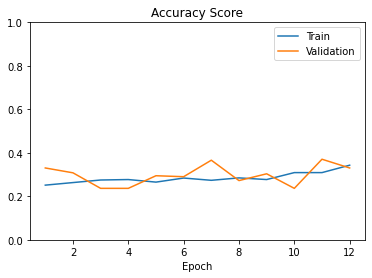

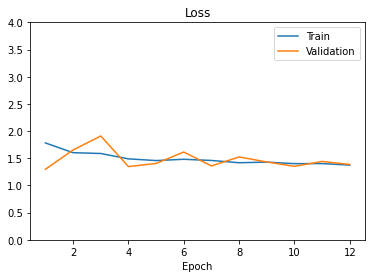

In [ ]:
import torchvision.models as models
import torch.optim as optim
from torch import nn
import torch
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from statistics import mean
from google.colab import output as colab_output

resnet18 = models.resnet18
model = resnet18(num_classes = 4)
model.fc = nn.Sequential(
    nn.Dropout(0.85),
    nn.Linear(in_features=512, out_features=4, bias=True)
)

optimizer = optim.Adam(model.parameters(), lr=0.001)

# model(train_dataset[0][0].reshape(1,3,224,224))
loss_function = nn.CrossEntropyLoss()

n_epoch = 35
 

# s = 0
# def append_dropout(model,s,rate=0.005):
#     for name, module in model.named_children():
#         if len(list(module.children())) > 0:
#             append_dropout(module,s)
#         if isinstance(module, nn.ReLU):
#             new = nn.Sequential(module, nn.Dropout2d(p=rate, inplace=False))
#             s += 1
#             print(s)
#             setattr(model, name, new)
        
# print model
# fc dropout 
# def append_dropout(model, rate=0.03):
#     for name, module in model.named_children():
#         if len(list(module.children())) > 0:
#             append_dropout(module)
#         if isinstance(module, nn.ReLU):
#             new = nn.Sequential(module, nn.Dropout2d(p=rate, inplace=False))
#             setattr(model, name, new)




use_cuda = torch.cuda.is_available()                   # check if GPU exists
device = torch.device("cuda" if use_cuda else "cpu")   # use CPU or GPU

train_accuracy = []
valid_accuracy = []

train_loss = []
valid_loss = []

n_batches = int(len(train_dataset) / batch_size)
print('Starting Train using device:{}'.format(device))

# append_dropout(model)
model.to(device)
for epoch in range(n_epoch):
  # 1. Train Phase
  model.train()
  train_batch_accuracy = []
  train_batch_loss = []
  for idx, (X,y) in enumerate(train_dl):
    X = X.to(device)
    y = y.to(device).view(-1,)
    optimizer.zero_grad()
    output = model(X)
    y_pred = torch.max(output,1)[1]
    train_batch_score = accuracy_score(y.cpu().data.squeeze().numpy(), y_pred.cpu().data.squeeze().numpy())
    train_batch_accuracy.append(train_batch_score)


    loss = loss_function(output,y)
    train_batch_loss.append(loss.item())

    loss.backward()
    optimizer.step()

  train_accuracy.append(mean(train_batch_accuracy))
  train_loss.append(mean(train_batch_loss))
    # print('Epoch:{} Batch:{}/{} Train Loss:{}  Train Accuracy:{}'.format(epoch,idx,n_batches,loss.item(),batch_score))
  # 2. Validation Phase
  model.eval()
  with torch.no_grad():
    Valid_batch_accuracy = []
    Valid_batch_loss = []
    for idx, (X,y) in enumerate(valid_dl):
      X = X.to(device)
      y = y.to(device).view(-1,)
      output = model(X)
      y_pred = torch.max(output,1)[1]

      
      # print(idx)
      # print(y)
      # print(y_pred)
      valid_batch_score = accuracy_score(y.cpu().data.squeeze().numpy(), y_pred.cpu().data.squeeze().numpy())
      Valid_batch_accuracy.append(valid_batch_score)

      loss = loss_function(output,y)
      Valid_batch_loss.append(loss.item())

    valid_accuracy.append(mean(Valid_batch_accuracy))
    valid_loss.append(mean(Valid_batch_loss))
  # 3. Showing Reports
  
  colab_output.clear()
  plt.plot(list(range(1,epoch+2)),train_accuracy)
  plt.plot(list(range(1,epoch+2)),valid_accuracy)

  plt.legend(['Train','Validation'])
  plt.title('Accuracy Score')
  plt.ylim([0,1])
  plt.xlabel('Epoch')
  plt.show()

  
  plt.plot(list(range(1,epoch+2)),train_loss)
  plt.plot(list(range(1,epoch+2)),valid_loss)

  plt.legend(['Train','Validation'])
  plt.title('Loss')
  plt.ylim([0,4])
  plt.xlabel('Epoch')
  plt.show()



  


    

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): Sequential(
    (0): ReLU(inplace=True)
    (1): Dropout2d(p=0.03, inplace=False)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): Sequential(
        (0): ReLU(inplace=True)
        (1): Dropout2d(p=0.03, inplace=False)
      )
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1

In [ ]:
torch.save(model, '/content/drive/MyDrive/15_aug_32_NASA_RESNET18.pth')

In [ ]:
# Testing model with the test data 
import math 
model.eval()
with torch.no_grad():
  Test_batch_accuracy = []
  for idx, (X,y) in enumerate(test_dl):
    X = X.to(device)
    y = y.to(device).view(-1,)
    output = model(X)
    y_pred = torch.max(output,1)[1]


    Test_batch_score = accuracy_score(y.cpu().data.squeeze().numpy(), y_pred.cpu().data.squeeze().numpy())
    Test_batch_accuracy.append(Test_batch_score)



  Test_accuracy = mean(Test_batch_accuracy)

print('Model accuracy on test data: {}%'.format(np.round(Test_accuracy * 100,3)))


Model accuracy on test data: 66.071%


In [ ]:
# X_test[0]
# test_data, test_target = image_datasets['train'][idx]
img_1 = X_test[192].to(device)
img_1.unsqueeze_(0)
output = model(img_1)
labels = torch.argmax(output, 1)
# output|


print(labels)
names

tensor([2], device='cuda:0')


['Jessica_Meir', 'Joseph_Acaba', 'Raja_Chari', 'Scott_Tingle']

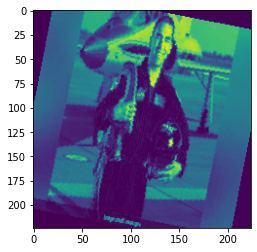

In [ ]:
import PIL
import torchvision.transforms as T

# X_test[1].shape

plt.imshow(X_test[192].numpy()[0])

In [ ]:
torch.save(model, '/content/drive/MyDrive/NASA_RESNET18.pth')

In [ ]:
from torchsummary import summary

summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
model_2 = torch.load('/content/drive/MyDrive/NASA_RESNET18.pth')


img_1 = X_test[5].to(device)
img_1.unsqueeze_(0)
output = model_2(img_1)
labels = torch.argmax(output, 1)

labels

tensor([2], device='cuda:0')